## Evaluate ranking metrics before

ngc batch run --name "tranf4rec-htune-v06-gpt2" --preempt RUNONCE --ace nv-us-west-2 --instance dgx1v.32g.2.norm --commandline "nvidia-smi && wandb login 76eea90114bb1cdcbafe151b262e4a5d4ff60f12 && date && git pull origin experimentation && date && bash script/run_transformer_v2.bash htune-v06-gpt2 full_noneg session_cooccurrence --start_date 2019-10-01 --end_date 2019-10-15 --model_type gpt2 --loss_type cross_entropy --per_device_eval_batch_size 128 --similarity_type concat_mlp --tf_out_activation tanh --all_rescale_factor 1.0 --neg_rescale_factor 0.0 --inp_merge mlp --hidden_act gelu_new --learning_rate_warmup_steps 0 --learning_rate_num_cosine_cycles 4.0 --dataloader_drop_last --compute_metrics_each_n_steps 50 --max_seq_len 20 --num_train_epochs 8 --per_device_train_batch_size 64 --learning_rate 0.002765352013424135 --learning_rate_schedule constant_with_warmup --dropout 0.1 --weight_decay 3.1625564350525762e-06 --d_model 256 --n_layer 2 --n_head 2 --log_predictions --log_attention_weights && date" --result /results --image "nvidian/prj-recsys/transf4rec_exp:0.1.0" --org nvidian --team prj-recsys --datasetid 66609:/data

- Running it again logging predictions and attention weights
Id: 1516063

laced-fire-1297
https://wandb.ai/gspmoreira/huggingface/runs/2iqaecgb/overview?workspace=user-gspmoreira
AOD_all_Test_ndcg@1000_all: 0.5304

In [8]:
import os
import pandas as pd
import seaborn as sns

In [9]:
BASE_PATH = '1543939_sleek-puddle-1863/pred_logs/'

In [10]:
preds_df = pd.read_parquet(os.path.join(BASE_PATH, 'preds_date_2019-10-15.parquet'))
len(preds_df)

3456

In [11]:
preds_df.columns

Index(['metadata_seq_len', 'metadata_seq_pos', 'metadata_sess_bid_seq',
       'metadata_sess_ccid_seq', 'metadata_sess_csid_seq',
       'metadata_sess_pid_seq', 'metadata_sess_product_recency_seq',
       'metric_all_avg_precision@10', 'metric_all_avg_precision@100',
       'metric_all_avg_precision@1000', 'metric_all_avg_precision@5',
       'metric_all_ndcg@10', 'metric_all_ndcg@100', 'metric_all_ndcg@1000',
       'metric_all_ndcg@5', 'metric_all_precision@10',
       'metric_all_precision@100', 'metric_all_precision@1000',
       'metric_all_precision@5', 'metric_all_recall@10',
       'metric_all_recall@100', 'metric_all_recall@1000',
       'metric_all_recall@5'],
      dtype='object')

In [12]:
preds_df

,metadata_seq_len,metadata_seq_pos,metadata_sess_bid_seq,metadata_sess_ccid_seq,metadata_sess_csid_seq,metadata_sess_pid_seq,metadata_sess_product_recency_seq,metric_all_avg_precision@10,metric_all_avg_precision@100,metric_all_avg_precision@1000,...,metric_all_ndcg@1000,metric_all_ndcg@5,metric_all_precision@10,metric_all_precision@100,metric_all_precision@1000,metric_all_precision@5,metric_all_recall@10,metric_all_recall@100,metric_all_recall@1000,metric_all_recall@5
0,[4],[4],[65],[131],[15],[21205],[-0.61365515],0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0
1,[3],[3],[541],[131],[152],[43672],[-0.6356059],0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0
2,[2],[2],[25],[29],[45],[5592],[-0.6283142],0.0,0.038462,0.038462,...,0.210310,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
3,[4],[4],[18],[29],[45],[3700],[-0.5793567],0.0,0.000000,0.004329,...,0.127259,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
4,[5],[5],[24],[8],[8],[320],[-0.6326033],0.0,0.000000,0.005952,...,0.135119,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,[3],[3],[30],[131],[3],[5326],[-0.60415775],0.0,0.000000,0.003876,...,0.124738,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
3452,[2],[2],[3],[3],[10],[120],[-0.6148853],1.0,1.000000,1.000000,...,1.000000,1.0,0.1,0.01,0.001,0.2,1.0,1.0,1.0,1.0
3453,[2],[2],[3],[2],[2],[55],[-0.58081603],0.0,0.055556,0.055556,...,0.235409,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
3454,[4],[4],[16],[11],[23],[14032],[-0.6120664],0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0


In [13]:
COLS_TO_SQUEEZE = ['metadata_sess_pid_seq', 'metadata_seq_pos', 'metadata_seq_len']

for col in COLS_TO_SQUEEZE:
    print (col)
    preds_df[col] = preds_df[col].apply(lambda x: x[0])

metadata_sess_pid_seq
metadata_seq_pos
metadata_seq_len


## Analyzing metrics

In [14]:
metrics_Cols = ['metric_all_ndcg@1000', 'metric_all_avg_precision@1000', 'metric_all_recall@1000']

In [15]:
preds_df[metrics_Cols].mean()

metric_all_ndcg@1000             0.178264
metric_all_avg_precision@1000    0.083984
metric_all_recall@1000           0.671007
dtype: float64

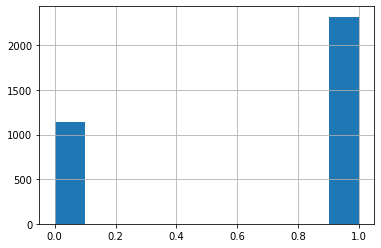

In [16]:
preds_df['metric_all_recall@1000'].hist()

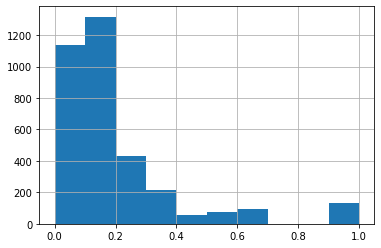

In [17]:
preds_df['metric_all_ndcg@1000'].hist()

In [18]:
preds_df.groupby('metric_all_ndcg@1000').size().sort_values(ascending=False)

metric_all_ndcg@1000
0.000000    1137
1.000000     135
0.630930      92
0.500000      75
0.430677      55
            ... 
0.114664       1
0.114709       1
0.114800       1
0.114891       1
0.119279       1
Length: 574, dtype: int64

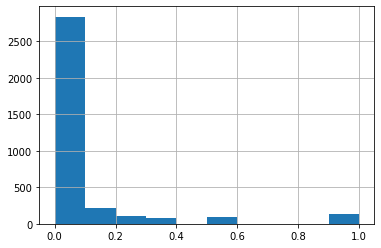

In [19]:
preds_df['metric_all_avg_precision@1000'].hist()

## Computing categ features popularity

In [20]:
days = []
for day in range(2,15):
    days.append(pd.read_parquet(os.path.join(BASE_PATH, 'preds_date_2019-10-{:02}.parquet'.format(day))))
    
preds_full_df = pd.concat(days)

for col in COLS_TO_SQUEEZE:
    print (col)
    preds_full_df[col] = preds_full_df[col].apply(lambda x: x[0])

metadata_sess_pid_seq
metadata_seq_pos
metadata_seq_len


In [21]:
pid_pop_df = preds_full_df.groupby('metadata_sess_pid_seq').size().to_frame('pid_count').reset_index()
pid_pop_df

,metadata_sess_pid_seq,pid_count
0,2,237
1,3,238
2,4,214
3,5,150
4,6,139
...,...,...
15734,197147,1
15735,199681,1
15736,200854,1
15737,202974,1


## Computing stats on models accuracy

In [22]:
preds_df = preds_df.merge(pid_pop_df, how='left')

In [23]:
preds_df.head(5)

,metadata_seq_len,metadata_seq_pos,metadata_sess_bid_seq,metadata_sess_ccid_seq,metadata_sess_csid_seq,metadata_sess_pid_seq,metadata_sess_product_recency_seq,metric_all_avg_precision@10,metric_all_avg_precision@100,metric_all_avg_precision@1000,...,metric_all_ndcg@5,metric_all_precision@10,metric_all_precision@100,metric_all_precision@1000,metric_all_precision@5,metric_all_recall@10,metric_all_recall@100,metric_all_recall@1000,metric_all_recall@5,pid_count
0,4,4,[65],[131],[15],21205,[-0.61365515],0.0,0.000000,0.000000,...,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,NaN
1,3,3,[541],[131],[152],43672,[-0.6356059],0.0,0.000000,0.000000,...,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,NaN
2,2,2,[25],[29],[45],5592,[-0.6283142],0.0,0.038462,0.038462,...,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0,1.0
3,4,4,[18],[29],[45],3700,[-0.5793567],0.0,0.000000,0.004329,...,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0,2.0
4,5,5,[24],[8],[8],320,[-0.6326033],0.0,0.000000,0.005952,...,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0,3.0


### Analyzing correlation between accuracy and label metadata stats

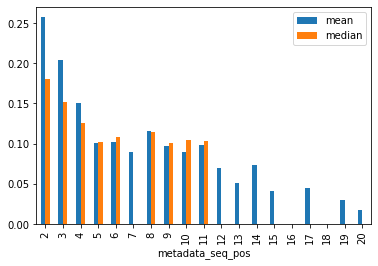

In [24]:
preds_df.groupby('metadata_seq_pos')['metric_all_ndcg@1000'].agg(['mean', 'median']).plot.bar()

In [25]:
pd.set_option("display.max_rows", None)
preds_df.groupby(['metadata_seq_len', 'metadata_seq_pos'])['metric_all_ndcg@1000'].agg(['mean'])

,,mean
metadata_seq_len,metadata_seq_pos,
2,2,0.257461
3,3,0.203631
4,4,0.150008
5,5,0.100491
6,6,0.102443
7,7,0.090071
8,8,0.116406
9,9,0.096667
10,10,0.089693


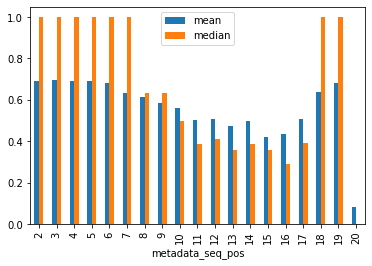

In [27]:
preds_df.groupby('metadata_seq_pos')['metric_all_ndcg@1000'].agg(['mean', 'median']).plot.bar()

In [26]:
preds_df['ndcg@1000_bin'] = pd.cut(preds_df['metric_all_ndcg@1000'], 4)

In [27]:
preds_df.groupby('ndcg@1000_bin').size()

ndcg@1000_bin
(-0.001, 0.25]    2748
(0.25, 0.5]        481
(0.5, 0.75]         92
(0.75, 1.0]        135
dtype: int64

In [28]:
preds_df.groupby('ndcg@1000_bin')[['metadata_seq_pos',
                                   'pid_count']].agg(['mean', 'median'])

metadata_seq_pos         pid_count       
                           mean median       mean median
ndcg@1000_bin                                           
(-0.001, 0.25]         5.014920      4  21.121592    6.0
(0.25, 0.5]            2.979210      2  59.613391   32.0
(0.5, 0.75]            2.934783      2  78.482759   53.0
(0.75, 1.0]            2.703704      2  99.455224   82.5

In [29]:
preds_df[['metric_all_ndcg@1000', 'metadata_seq_pos', 'pid_count']] \
     .corr(method='spearman')['metric_all_ndcg@1000']

metric_all_ndcg@1000    1.000000
metadata_seq_pos       -0.372865
pid_count               0.566809
Name: metric_all_ndcg@1000, dtype: float64

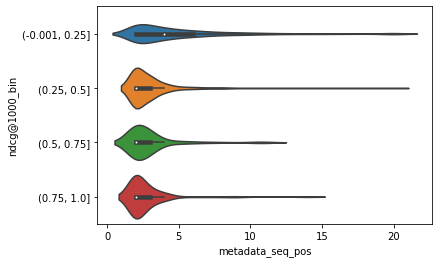

In [30]:
ax = sns.violinplot(x='metadata_seq_pos', y='ndcg@1000_bin', data=preds_df)

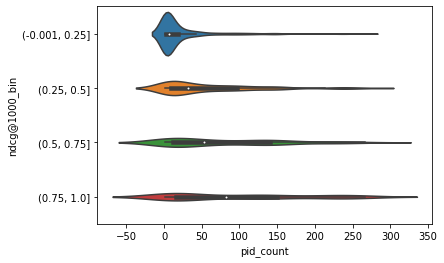

In [31]:
ax = sns.violinplot(x='pid_count', y='ndcg@1000_bin', data=preds_df)

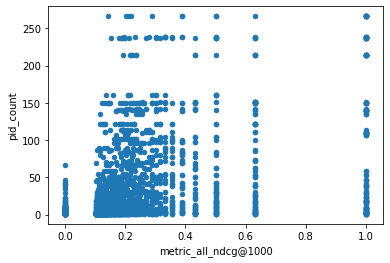

In [32]:
preds_df.plot.scatter(y='pid_count', x='metric_all_ndcg@1000')

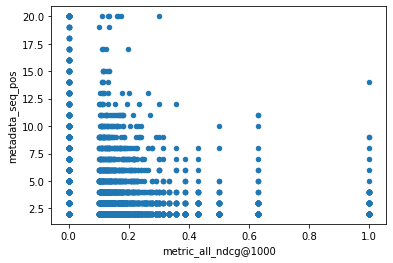

In [33]:
preds_df.plot.scatter(y='metadata_seq_pos', x='metric_all_ndcg@1000')